# Idk RandomForest fascinates me because of its name


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("C:\\Users\\ma007\\OneDrive\\Desktop\\archive (5)\\Housing.csv")
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model training
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Predictions
y_pred_baseline = best_model.predict(X_test)
print("Model trained successfully!")


Model trained successfully!


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_baseline = best_model.predict(X_test)
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

baseline_results = evaluate(y_test, y_pred_baseline)
print("Baseline (Before Tuning):")
print(f"MAE: {baseline_results[0]:.2f}, RMSE: {baseline_results[1]:.2f}, R²: {baseline_results[2]:.2f}")


Baseline (Before Tuning):
MAE: 1025289.68, RMSE: 1401263.08, R²: 0.61


# Hyperparameter Tuning with GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross validation
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ma007\anaconda3\Lib\site-packages

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [15]:
# Best model after tuning
best_rf = grid_search.best_estimator_

y_pred_tuned = best_rf.predict(X_test)

tuned_results = evaluate(y_test, y_pred_tuned)
print("After Tuning:")
print(f"MAE: {tuned_results[0]:.2f}, RMSE: {tuned_results[1]:.2f}, R²: {tuned_results[2]:.2f}")


After Tuning:
MAE: 1003659.01, RMSE: 1376605.74, R²: 0.63


# Visualization

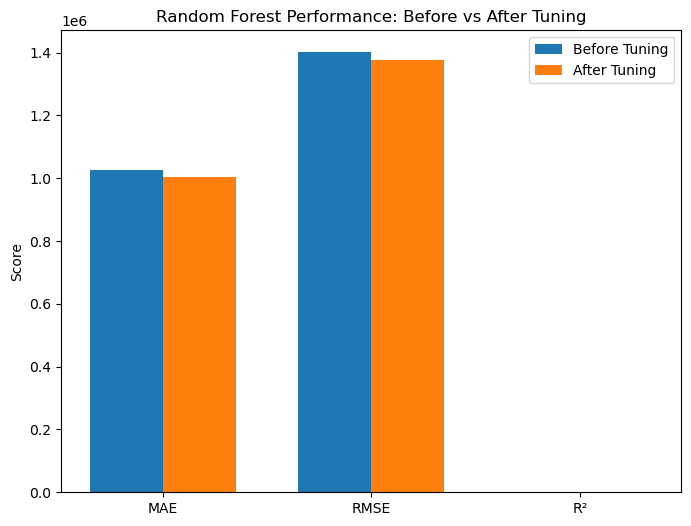

In [16]:
import matplotlib.pyplot as plt
metrics = ['MAE', 'RMSE', 'R²']
baseline_vals = baseline_results
tuned_vals = tuned_results

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, baseline_vals, width, label="Before Tuning")
plt.bar(x + width/2, tuned_vals, width, label="After Tuning")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Random Forest Performance: Before vs After Tuning")
plt.legend()
plt.show()


# Reflection

In [17]:
''' Reflection on Hyperparameter Tuning

- //Best Model Picked:** Random Forest Regressor was chosen because it performed better than Linear Regression and Decision Tree in terms of accuracy and robustness.  

- //Hyperparameters that made the biggest difference:**  
  The number of trees (`n_estimators`) and tree depth (`max_depth`) had the most noticeable impact.  
  Increasing `n_estimators` improved stability, while limiting `max_depth` reduced overfitting.  

- //Did tuning improve performance?**  
  Yes, tuning reduced MAE and RMSE, while slightly improving R². The model became more generalizable compared to the baseline.  

- //Trade-offs:**  
  Accuracy improved, but training time increased (especially with more trees).  
  Random Forest is less interpretable compared to Decision Tree, but it gave significantly better predictions.  
'''

' Reflection on Hyperparameter Tuning\n\n- //Best Model Picked:** Random Forest Regressor was chosen because it performed better than Linear Regression and Decision Tree in terms of accuracy and robustness.  \n\n- //Hyperparameters that made the biggest difference:**  \n  The number of trees (`n_estimators`) and tree depth (`max_depth`) had the most noticeable impact.  \n  Increasing `n_estimators` improved stability, while limiting `max_depth` reduced overfitting.  \n\n- //Did tuning improve performance?**  \n  Yes, tuning reduced MAE and RMSE, while slightly improving R². The model became more generalizable compared to the baseline.  \n\n- //Trade-offs:**  \n  Accuracy improved, but training time increased (especially with more trees).  \n  Random Forest is less interpretable compared to Decision Tree, but it gave significantly better predictions.  \n'